In [2]:
import numpy as np
from sklearn.datasets import load_boston
from LinearModels.lasso_regression import LassoRegression
from utils import standardize

In [3]:
boston = load_boston()

In [4]:
X = boston.data
y = boston.target

In [5]:
import matplotlib.pyplot as plt

The following chart shows the path of the covariates with differing sizes of alpha.

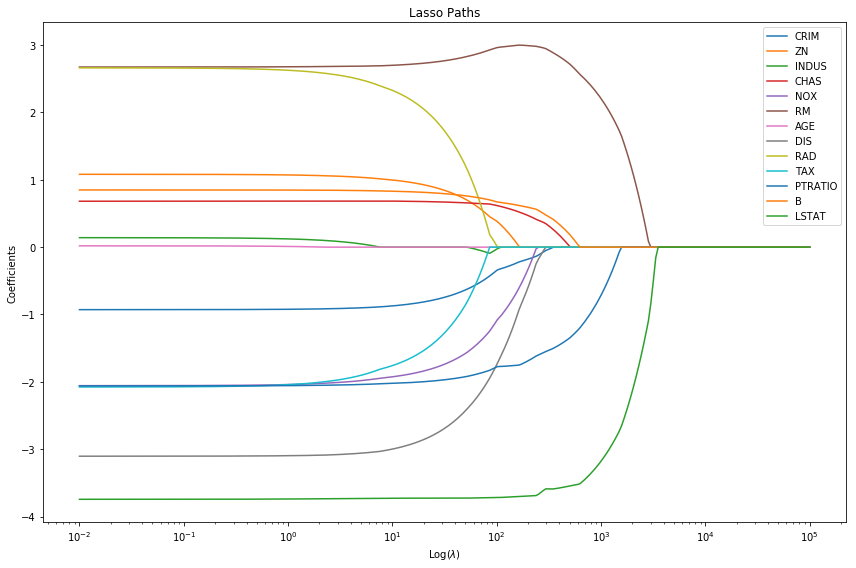

In [7]:
# Initialize variables
theta_list = []
lamda      = np.logspace(-2,5,300) #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
     lasso = LassoRegression(alpha=l, n_iter=300, centered=True)
     lasso.fit(X, y)
     theta_list.append(lasso.coef_[1:])

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = boston.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.axis('tight')
plt.tight_layout()